In [3]:
#Loading packages
pacman::p_load(tidyverse, tidyr, dplyr, readxl, janitor, ggplot2, gridExtra, stringr)

In [4]:
#loading the datasets
indicators = read_excel("Key-Economic-and-Social-Indicators.xlsx")
internationalscene = read_excel("International-Scene.xlsx", sheet = 2)

New names:
• `` -> `...1`
• `` -> `...9`
New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`


In [5]:
#lets check the names of the columns
names(internationalscene)

[1] "Table 1.2: Real GDP Growth, Inflation and Current Account Balances for Selected Regions and Countries, 2019-2023"
 [2] "...2"                                                                                                            
 [3] "...3"                                                                                                            
 [4] "...4"                                                                                                            
 [5] "...5"                                                                                                            
 [6] "...6"                                                                                                            
 [7] "...7"                                                                                                            
 [8] "...8"                                                                                                            
 [9] "...9"                                                                                                            
[10] "...10"                                                                                                           
[11] "...11"                                                                                                           
[12] "...12"                                                                                                           
[13] "...13"                                                                                                           
[14] "...14"                                                                                                           
[15] "...15"                                                                                                           
[16] "...16"

In [6]:
#data cleaning
colnames(internationalscene)= internationalscene[1, ]
internationalscene = internationalscene[-1, ]
colnames(internationalscene)= internationalscene[1, ]
internationalscene = internationalscene[-1, ]

In [7]:
#deleting a row and making another row the column heads
internationalscene1 = internationalscene %>% t()
colnames(internationalscene1) = internationalscene1[1, ]
internationalscene1 = internationalscene1[-1, ]

In [8]:
#column names
internationalscene1 =data.frame(internationalscene1)
names(internationalscene1)

[1] "BRIICS"                                                                                                                                                                           
 [2] "Brazil........."                                                                                                                                                                  
 [3] "Russia........."                                                                                                                                                                  
 [4] "India........"                                                                                                                                                                    
 [5] "Indonesia......"                                                                                                                                                                  
 [6] "China........."                                                                                                                                                                   
 [7] "South.Africa......"                                                                                                                                                               
 [8] "Sub.Saharan.Africa"                                                                                                                                                               
 [9] "EAC.5"                                                                                                                                                                            
[10] "Kenya........"                                                                                                                                                                    
[11] "Tanzania........"                                                                                                                                                                 
[12] "Uganda........."                                                                                                                                                                  
[13] "Rwanda........."                                                                                                                                                                  
[14] "Burundi........."                                                                                                                                                                 
[15] "SADC"                                                                                                                                                                             
[16] "WAEMU"                                                                                                                                                                            
[17] "CEMAC"                                                                                                                                                                            
[18] "ASEAN.5"                                                                                                                                                                          
[19] "Indonesia........"                                                                                                                                                                
[20] "Malaysia......."                                                                                                                                                                  
[21] "Philippines......"                                                                                                                                                                
[22] "Thailand......."                                                                                              

In [9]:
#renaming the column
internationalscene2 = internationalscene1 %>% 
  select(`Kenya........`, `Tanzania........`, `Uganda.........`, `Rwanda.........`,`Burundi.........`) 
internationalscene2 = internationalscene2 %>% rename(Kenya =`Kenya........`, Tanzania = `Tanzania........`, Uganda = `Uganda.........`, Rwanda = `Rwanda.........`, Burundi = `Burundi.........`)

In [10]:
#moving index to be a new column
internationalscene2= cbind(Year = rownames(internationalscene2),internationalscene2)
rownames(internationalscene2)=1:nrow(internationalscene2)

In [11]:
#changing the datatype for columns with numeric values to numeric
internationalscene2$Kenya =as.numeric(internationalscene2$Kenya)
internationalscene2$Tanzania =as.numeric(internationalscene2$Tanzania)
internationalscene2$Uganda =as.numeric(internationalscene2$Uganda)
internationalscene2$Rwanda =as.numeric(internationalscene2$Rwanda)
internationalscene2$Burundi =as.numeric(internationalscene2$Burundi)
summary(internationalscene2)

     Year               Kenya          Tanzania          Uganda         
 Length:15          Min.   :-5.90   Min.   :-4.400   Min.   :-10.20000  
 Class :character   1st Qu.:-4.85   1st Qu.:-2.150   1st Qu.: -7.20000  
 Mode  :character   Median : 5.10   Median : 3.700   Median :  2.30000  
                    Mean   : 1.84   Mean   : 2.013   Mean   :  0.06667  
                    3rd Qu.: 6.20   3rd Qu.: 4.850   3rd Qu.:  6.15000  
                    Max.   : 7.50   Max.   : 7.000   Max.   :  7.70000  
     Rwanda             Burundi        
 Min.   :-12.60000   Min.   :-14.9000  
 1st Qu.:-11.30000   1st Qu.:-10.9000  
 Median :  2.40000   Median :  1.8000  
 Mean   : -0.08667   Mean   : -0.7267  
 3rd Qu.:  7.85000   3rd Qu.:  5.7000  
 Max.   : 10.90000   Max.   : 17.3000  

In [12]:
#removing special characters
internationalscene2$Year = str_replace_all(internationalscene2$Year, "[^[:alnum:]]","")
internationalscene2$Year =substr(internationalscene2$Year,2,5)

In [13]:
#changing the datatype of Year to numeric
internationalscene2$Year = as.numeric(internationalscene2$Year)

In [14]:
#creating independent datasets 
#gdp
gdp = internationalscene2[1:5, ]
inflation = internationalscene2[6:10, ]
balances =internationalscene2[11:15, ]

In [15]:
#converting the datasets to longer
gdp1 = gdp %>% 
  pivot_longer(
    col =starts_with(c("Kenya", "Tanzania", "Uganda","Rwanda","Burundi")),
    names_to = "Country",
    values_to = "gdp"
  )

inflation1 = inflation %>% 
  pivot_longer(
    col = c("Kenya", "Tanzania", "Uganda","Rwanda","Burundi"),
    names_to = "Country",
    values_to = "Inflation"
  )

balances1= balances %>% 
  pivot_longer(
    col=c("Kenya", "Tanzania", "Uganda","Rwanda","Burundi"),
    names_to = "Country",
    values_to = "balances"
  )

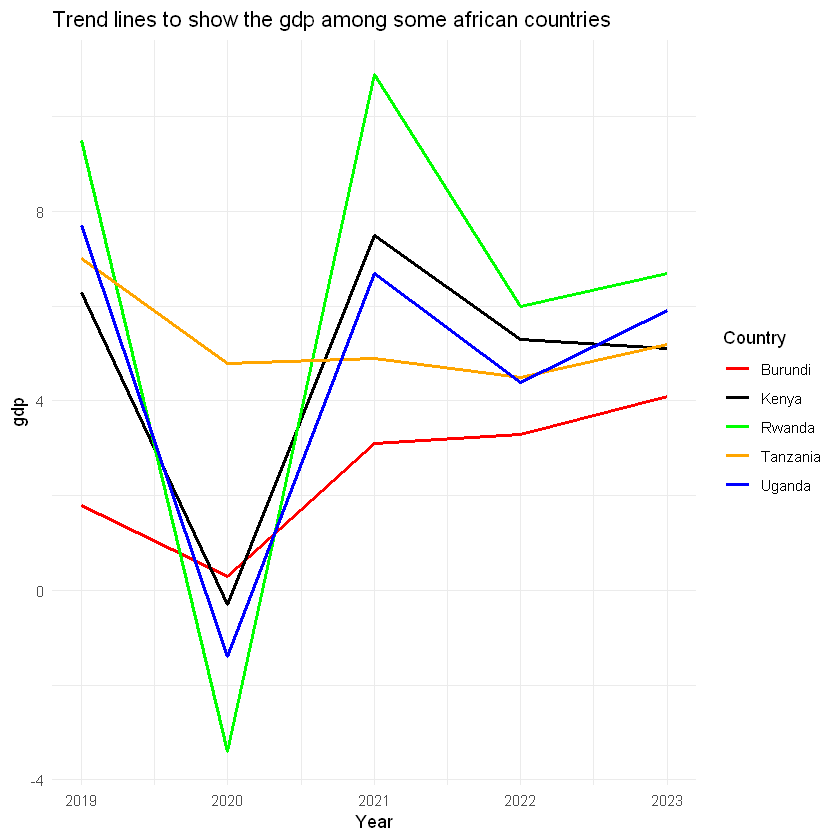

In [16]:
#getting the trend line for gdp
ggplot(gdp1, aes(x= Year, y= gdp, colour= Country))+
  geom_line(linewidth=1)+
  labs(title = "Trend lines to show the gdp among some african countries")+
  theme_minimal()+
  scale_colour_manual(values = c("red","black","green","orange","blue"))

#Higher GDP indicates a stronger economy, with urban areas offering better jobs, education, healthcare, and services. This migration from rural to urban areas fuels urbanization, as seen in Kenya's 2021 GDP increase.

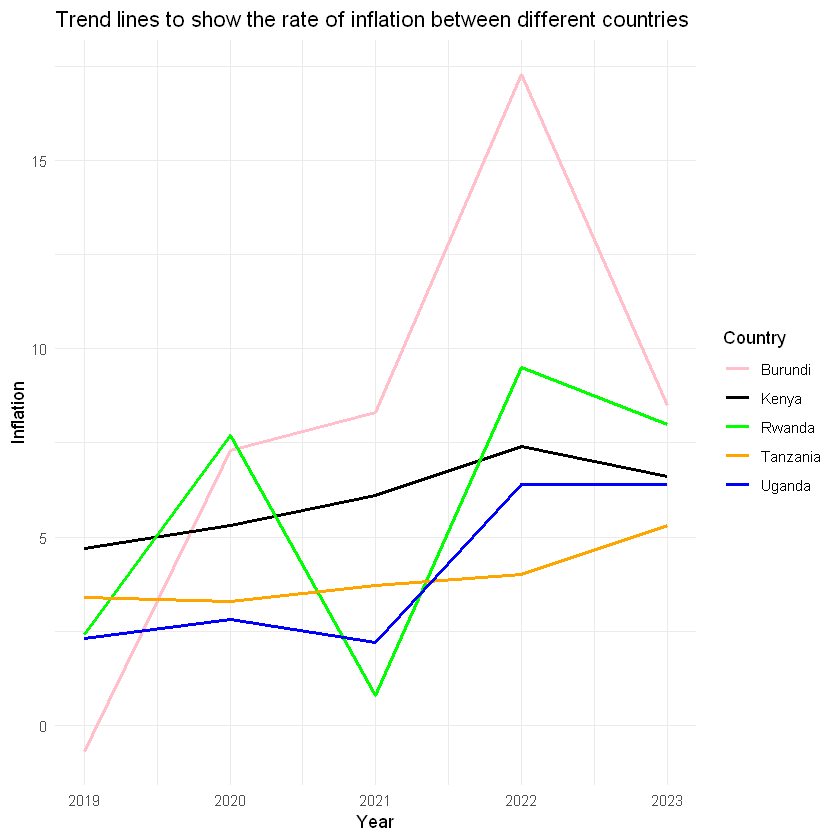

In [17]:
#visualization
ggplot(inflation1, aes(x= Year, y = Inflation, colour =Country))+
  geom_line(linewidth = 1)+
  labs(title = "Trend lines to show the rate of inflation between different countries")+
  theme_minimal()+
  scale_colour_manual(values = c("pink","black","green","orange","blue"))

#Urbanization often involves increased demand for housing and commercial real estate in cities. When inflation is stable, it's easier for individuals and institutions to make real estate investments with confidence that property values won't erode rapidly due to inflation. This can encourage property development and urban growth.as shown in the graph kenya's inflation rate is moderate this is even supported by the graph on housing and development to be seen in the coming slides.

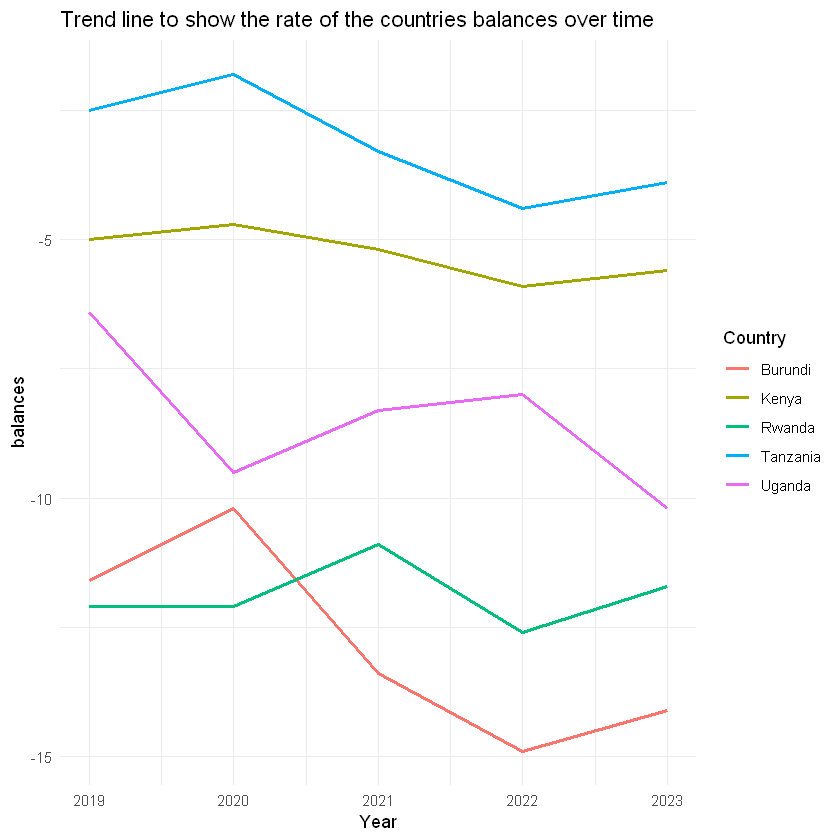

In [18]:
ggplot(balances1, aes(x =Year, y = balances, colour =Country))+
  geom_line(linewidth = 1)+
  labs(title = "Trend line to show the rate of the countries balances over time")+
  theme_minimal()

In [19]:
#Loading the next dataset
construction_buildings = read_excel("Construction-Sector.xlsx", sheet = 4)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`


In [20]:
#datacleaning
#deleting a row and making another row the column heads
colnames(construction_buildings) = construction_buildings[1, ]
construction_buildings = construction_buildings[-1, ]
colnames(construction_buildings) = construction_buildings[1, ]
construction_buildings = construction_buildings[-1, ]
construction_buildings = construction_buildings[-6, ]
construction_buildings = construction_buildings[-6, ]
#deleting columns i dont need
construction_buildings = construction_buildings[, 1:4]
#renaming the column non_residential
construction_buildings=rename(construction_buildings,NonResidential=`Non- Residential`)

In [21]:
#converting the data to wide
construction_buildings1 =construction_buildings %>% 
  pivot_longer(cols = c("Residential","NonResidential"),
               names_to = "House_type",
               values_to = "No_of_houses")

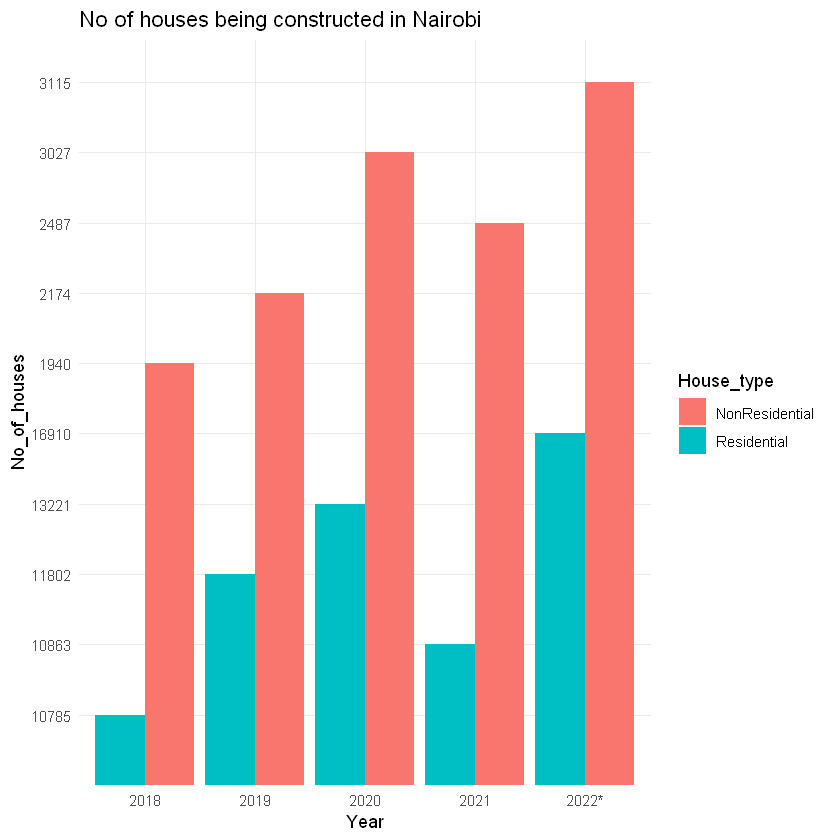

In [22]:
#stacked bar plot
resident_plot= ggplot(construction_buildings1 , aes(x =Year, y =No_of_houses, fill=House_type))+
  geom_bar(stat = "identity", position = "dodge")+
  labs(title = "No of houses being constructed in Nairobi")+
  theme_minimal()
#calling our plot
resident_plot

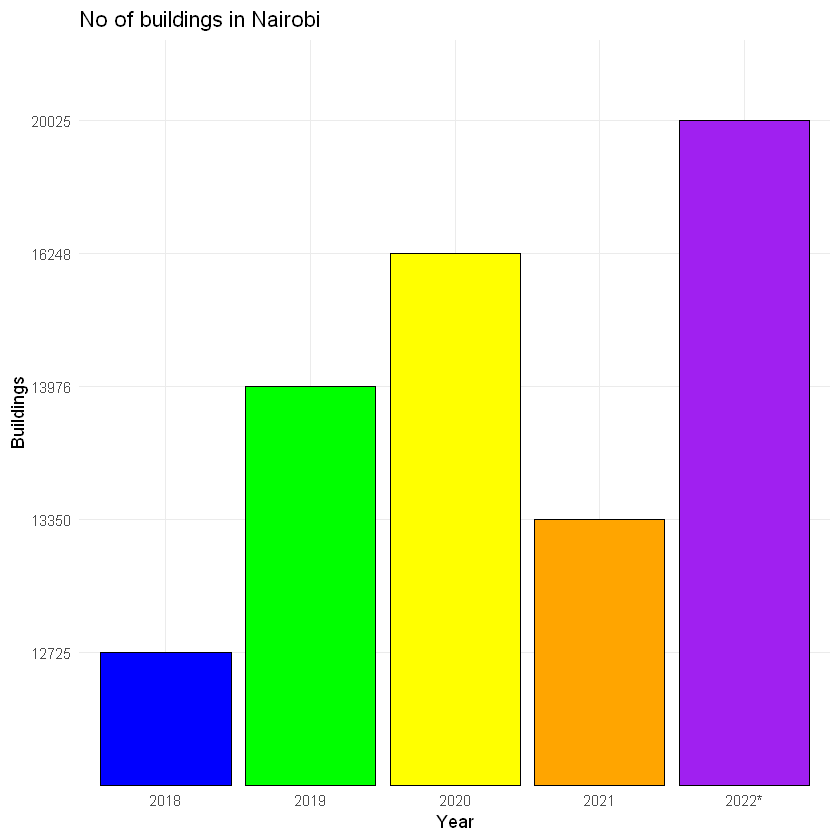

In [23]:
#barplot to show the increase in the number of buildings in Nairobi city
build_plot =ggplot(construction_buildings, aes(x = Year, y =Total))+
  geom_bar(width = 0.9,stat = "identity", col ="black", fill = c("blue", "green", "yellow", "orange", "purple"))+
  labs(title = "No of buildings in Nairobi", y = "Buildings")+
  theme_minimal()
#calling our plot
build_plot

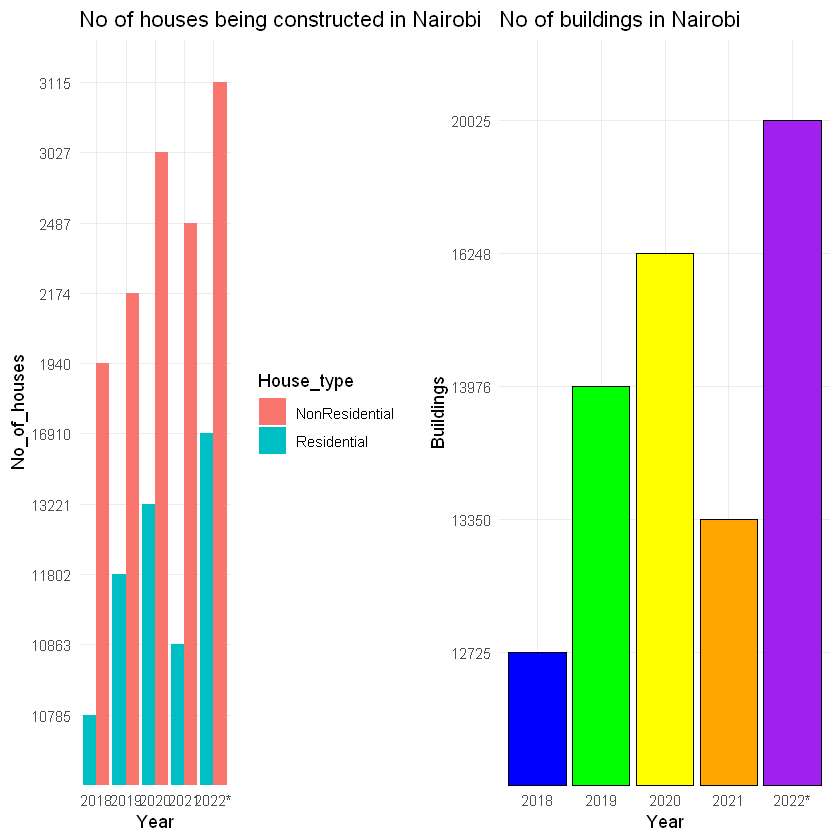

In [27]:
#merging the maps to appear on one pic
grid.arrange(resident_plot, build_plot, ncol =2)
#Population Growth: The construction of residential buildings often goes hand in hand with population growth in urban areas. As more housing becomes available, it can accommodate a larger population, contributing to urbanization. People from rural areas or other regions may migrate to urban centers in search of better job opportunities and living conditions. Urban Sprawl: The construction of both residential and non-residential buildings can contribute to urban sprawl, where cities expand outward. This can lead to increased urbanization as areas that were previously rural or undeveloped become integrated into the urban fabric. As shown in the plot, the number of buildings has been increasing.

In [30]:
#loading another dataset
labour =read_excel("Construction-Sector.xlsx", sheet = 3)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`


In [31]:
#cleaning the dataset
###deleting a row and making another row the column heads
colnames(labour) = labour[1, ]
labour = labour[-1, ]
colnames(labour)= labour[1, ]
labour = labour[-1, ]
labour = labour[-1, ]
labour = labour[-(4:8), ]

In [32]:
#transposing(making rows columns and columns to be rows)
labour = data.frame(t(labour))
#deleting a row and making another row the column heads
colnames(labour) = labour[1, ]
labour = labour[-1, ]
#pushing index to a column and giving the index numbers
labour1= cbind(Year = rownames(labour),labour)
rownames(labour1)=1:nrow(labour1)

In [33]:
#converting datset from wide to long format
labour_long = labour1 %>% pivot_longer(
  cols = c("Unskilled","Semi-Skilled","Skilled"),
  names_to =  "Skill",
  values_to = "Count"
)

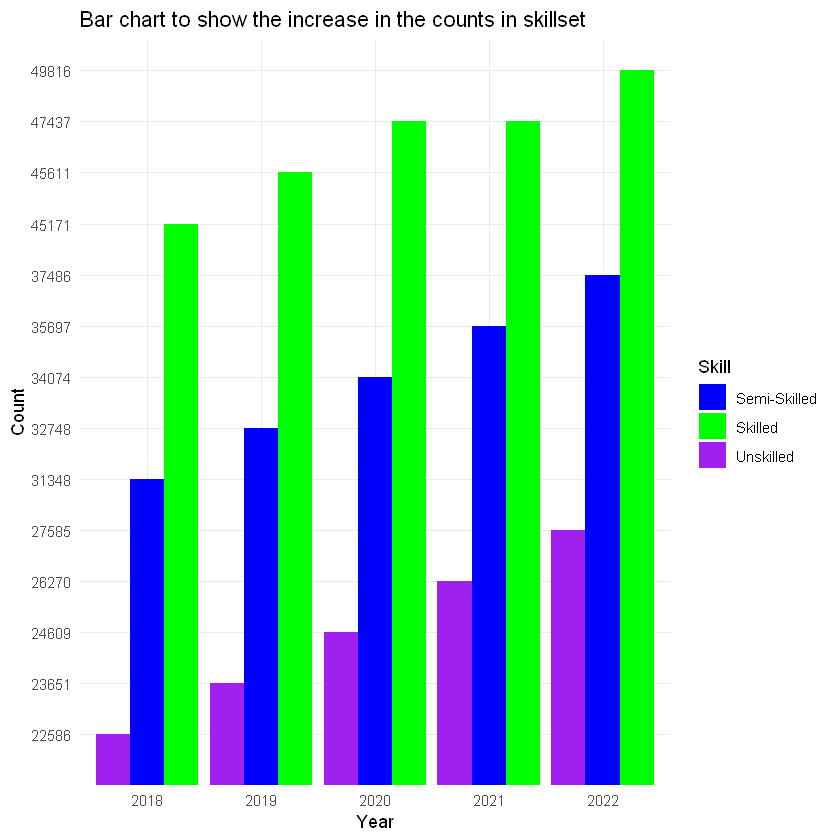

In [34]:
#stacked bar
ggplot(labour_long, aes(x = Year, y = Count, fill = Skill))+
  geom_bar(stat ="identity", position = "dodge")+
  labs(title = "Bar chart to show the increase in the counts in skillset")+
  theme_minimal()+
  scale_fill_manual(values = c("blue", "green", "purple"))
#Urbanization is driven by better job opportunities in urban areas, which attract businesses and industries requiring skilled labor. Skilled workers contribute to higher productivity and economic growth, leading to the expansion and development of urban areas. Skilled labor is essential in knowledge-based and technology-driven industries, creating specialized urban ecosystems. As the skill level improves, these clusters attract more talent and investment.According to the graph the skills are in the country are increasing.

In [35]:
#loading dataset
money = read_excel("International-Trade-and-Balance-of-Payments.xlsx", sheet = 18)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`


In [36]:
#cleaning dataset
colnames(money)= money[1, ]
money = money[-1, ]
money= money[-(24:30), ]
money = money[-(12:22), ]
money = money[-(4:10), ]

In [37]:
#getting data ready for analysis
#transpose
money = t(money)
#making 1st row a column
colnames(money)= money[1, ]
money = money[-1, ]
#making the indexes to be 1st row
money= cbind(Year = rownames(money),money)
rownames(money)=1:nrow(money)
#cleaning the column names
money = data.frame(clean_names(money))

In [38]:
#converting the data into a long format
money =  money %>% select(year,x1_euro2,x1_us_dollar,x1_pound_sterling)
money1 = money %>% 
  pivot_longer(
    cols = c("x1_euro2","x1_us_dollar","x1_pound_sterling"),
    names_to = "Currency",
    values_to = "Amount"
  )

In [39]:
#changing the datatype for amount to numeric and rounding it to two digits
money1$Amount = as.numeric(money1$Amount)
money1$Amount = round(money1$Amount, digits = 2)

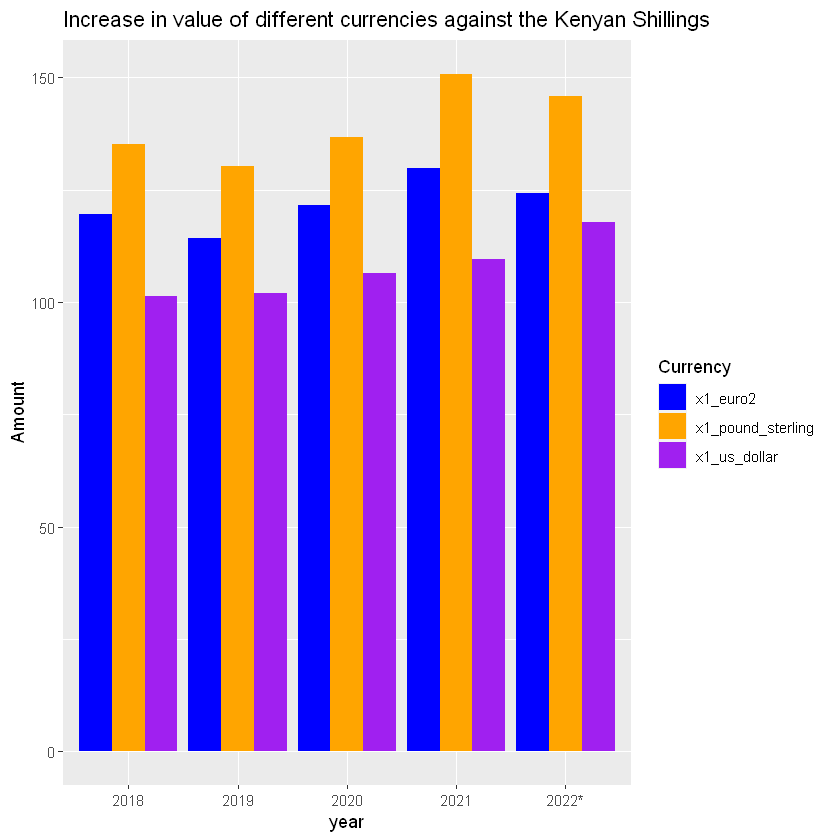

In [40]:
#plot
ggplot(money1, aes(x = year, y = Amount, fill = Currency))+
  geom_bar(stat = "identity", position = "dodge")+
  labs(title = "Increase in value of different currencies against the Kenyan Shillings")+
  scale_fill_manual(values = c("blue", "orange", "purple"))
#Inflation affects a country's exchange rates, causing it to depreciate relative to lower-inflation countries. This depreciation reduces a currency's purchasing power, making it less attractive to investors. However, moderate inflation can encourage investment in urban areas, leading to growth and expansion.According to the graph the Kenyan currency is weakening.

In [41]:
#loading dataset
traffic =read_excel("Governance-and-Peace-Security.xlsx", sheet = 1)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`


In [42]:
#data cleaning
colnames(traffic)= traffic[1, ]
traffic = traffic[-1, ]
colnames(traffic) = traffic[1, ]
traffic = traffic[-1, ]
#deleting unnecessary rows
traffic = traffic[-(1:10), ]
traffic = traffic[-(12:94), ]
traffic = traffic[-(2:11), ]
#selecting columns that I only need
traffic = traffic[, -(7:12)]
traffic = traffic[, -1]
#transpose
traffic =clean_names(traffic)
traffic$x2022 = as.numeric(traffic$x2022)
traffic1 =traffic %>% pivot_longer(
  cols = c("x2018","x2019","x2020","x2021", "x2022"),
  names_to = "Year",
  values_to = "Offences_Count"
)

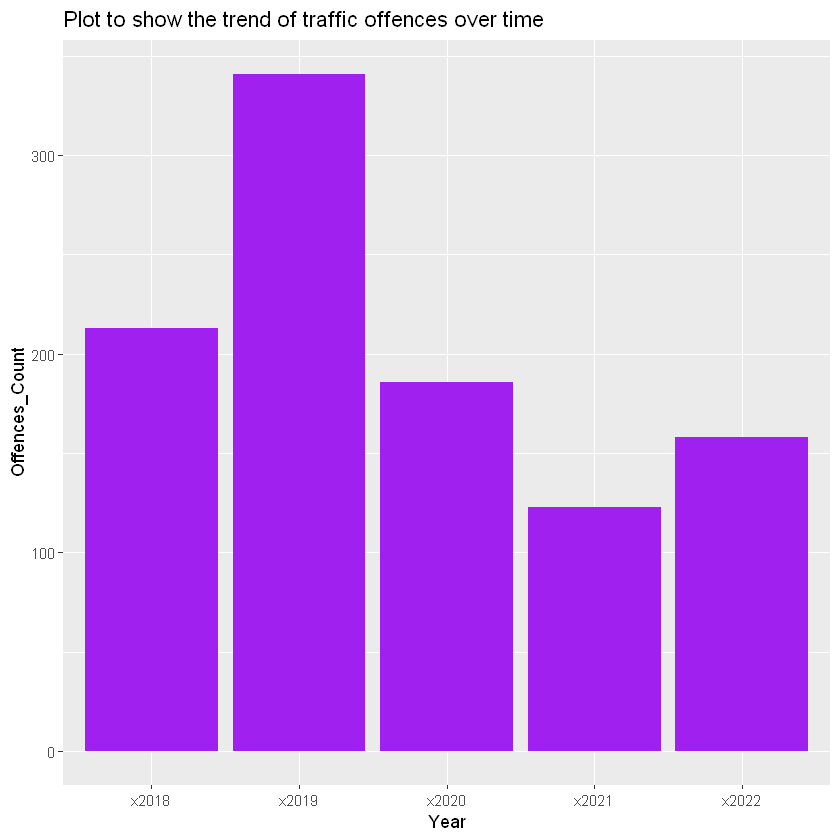

In [43]:
#line plot for traffic offences
ggplot(traffic1, aes(x= Year, y =Offences_Count))+
  geom_bar(stat = "identity", fill= "purple")+
  labs(title = "Plot to show the trend of traffic offences over time")
#Reduced traffic offenses lead to improved traffic safety, reducing accidents and injuries. This encourages more people to use public transportation systems, such as public transit, cycling, or walking. Lower traffic offenses also enhance public transportation systems, making them more efficient and reducing congestion and pollution in urban areas. Cities with lower traffic offenses attract businesses and investors due to well-managed transportation systems and safety reputations, potentially leading to increased economic activity and urban growth. As shown in the graph the number of traffic offences has been decreasing overall.

In [44]:
#loading dataset
agric_maize = read_excel("Agriculture-Sector.xlsx", sheet = 9, skip = 2 )

In [45]:
#data cleaning
agric_maize = agric_maize[-(6:8) ,] 
agric_maize = agric_maize[ , -2]
#transpose
agric_maize = data.frame(t(agric_maize))
#moving the column
colnames(agric_maize)= agric_maize[1, ]
agric_maize = agric_maize[-1, ]
#cleaning the column names
agric_maize= clean_names(agric_maize)
#moving the rownames
agric_maize =cbind(Year = rownames(agric_maize), agric_maize)
rownames(agric_maize)= 1:nrow(agric_maize)
#converting to numeric
agric_maize$maize= as.numeric(agric_maize$maize)
agric_maize$beans= as.numeric(agric_maize$beans)
agric_maize$potatoes= as.numeric(agric_maize$potatoes)
agric_maize$sorghum= as.numeric(agric_maize$sorghum)
agric_maize$millet= as.numeric(agric_maize$millet)

In [46]:
#converting dataset to longer
agric_maize1 = agric_maize %>% 
  pivot_longer(
    cols = c("maize","beans","potatoes","sorghum","millet"),
    names_to = "Crop",
    values_to = "Million_bags"
  )

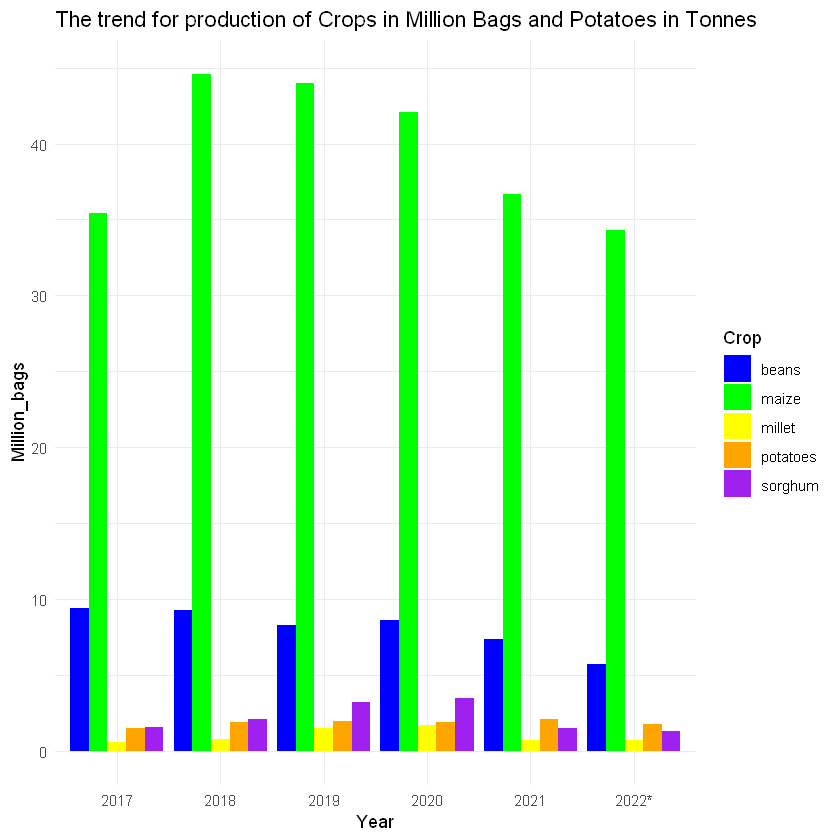

In [47]:
#visualization
ggplot(agric_maize1, aes(x= Year, y= Million_bags, fill = Crop))+
  geom_bar(stat = "identity",position = "dodge")+
  labs(title = "The trend for production of Crops in Million Bags and Potatoes in Tonnes")+
  theme_minimal()+
  scale_fill_manual(values = c("blue", "green","yellow","orange","purple"))
#Reduced traffic offenses lead to improved traffic safety, reducing accidents and injuries. This encourages more people to use public transportation systems, such as public transit, cycling, or walking. Lower traffic offenses also enhance public transportation systems, making them more efficient and reducing congestion and pollution in urban areas. Cities with lower traffic offenses attract businesses and investors due to well-managed transportation systems and safety reputations, potentially leading to increased economic activity and urban growth. As shown in the graph the number of traffic offences has been decreasing overall.

In [49]:
#Conclusion
#Urbanization is thus a complex phenomenon marked by a significant migration from rural to urban areas, 
#offering economic prospects and better living conditions. Factors such as GDP growth, stable inflation, 
#and skilled labor drive this urban shift. However, challenges like declining agricultural production and 
#traffic offenses persist. As cities expand, construction and population growth contribute to urbanization, 
transforming rural regions into urban centers. It is crucial to address infrastructure, services, and 
environmental concerns to ensure that urbanization fosters positive economic growth, equality, and sustainability, 
rather than exacerbating inequalities and environmental issues. 

Recommendations

Investing in infrastructure
Promoting sustainable practices
Enhancing access to education and healthcare.


ERROR: Error in parse(text = x, srcfile = src): <text>:6:14: unexpected symbol
5: #traffic offenses persist. As cities expand, construction and population growth contribute to urbanization, 
6: transforming rural
                ^
